# Regresión logística polinómica
Oscar Oswaldo Estrada Morales<br>
Inteligencia Artificial<br>
Ingeniería Bioinformática

In [34]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt

### Task 1.1

In [35]:
# Leer los datos desde el archivo csv
data = np.genfromtxt("framingham.csv", delimiter=",", skip_header=1, dtype=float)

# Extraer los datos X e Y del archivo
X = data[:, 1] # Age
Y = data[:, 15] # TenYearCHD (Paro cardiaco o no)

# Normalizar los datos de X
X = (X - np.mean(X)) / np.std(X)

### Task 1.2

In [36]:
# Agregar una columna de unos para el término de sesgo (bias)
X = np.column_stack((np.ones(len(X)), X))

# Inicializar los parámetros
theta = np.zeros(X.shape[1])

In [37]:
# Definir la función sigmoide
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Definir la función de costo para la regresión logística
def cost_function(theta, X, Y):
    h = sigmoid(np.dot(X, theta))
    return np.mean(-Y * np.log(h) - (1 - Y) * np.log(1 - h))

# Definir la función de gradiente para la regresión logística
def gradient(theta, X, Y):
    h = sigmoid(np.dot(X, theta))
    return np.dot(X.T, (h - Y)) / len(Y)


### Task 1.3

Iteración 0: costo = 0.693019524856378
Iteración 100: costo = 0.6805709725822469
Iteración 200: costo = 0.668729362554604
Iteración 300: costo = 0.6574645006639254
Iteración 400: costo = 0.6467473771077954
Iteración 500: costo = 0.6365501818890278
Iteración 600: costo = 0.6268463084192998
Iteración 700: costo = 0.6176103469823825
Iteración 800: costo = 0.6088180696841458
Iteración 900: costo = 0.6004464083763205


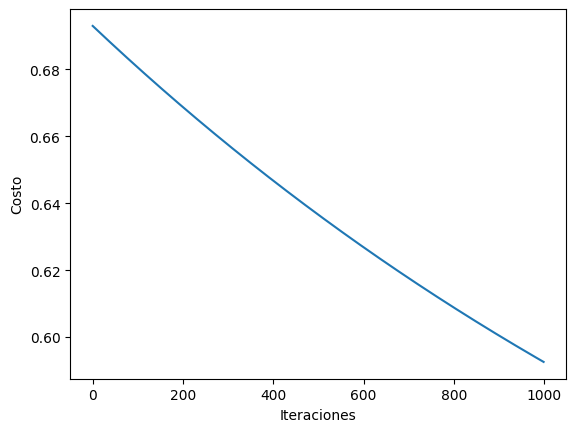

In [38]:
# Definir la tasa de aprendizaje y el número máximo de iteraciones
alpha = 0.001
max_iter = 1000

def log_reg(theta, X, Y, alpha, max_iter):
    costs = []
    for i in range(max_iter):
        theta -= alpha * gradient(theta, X, Y)
        cost = cost_function(theta, X, Y)
        costs.append(cost)
        if i % 100 == 0:
            print(f"Iteración {i}: costo = {cost}")
    return costs

# Realizar el descenso de gradiente y imprimir los costos
costs = log_reg(theta, X, Y, alpha, max_iter)

# Graficar la curva de costo
plt.plot(costs)
plt.xlabel('Iteraciones')
plt.ylabel('Costo')
plt.show()


Parámetros finales (Thetas finales): [-0.30815868  0.07166018]


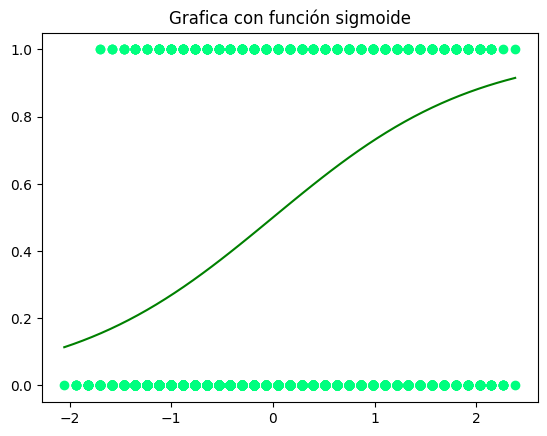

In [39]:

# Imprimir los parámetros finales
print(f"Parámetros finales (Thetas finales): {theta}")

# Graficar los datos de entrada y la línea de regresión logística
plt.scatter(X[:, 1], Y, color = "springgreen")

# Crear un rango de valores de Y para la gráfica
x_range = np.linspace(X[:,1].min(), X[:,1].max())
y_range = sigmoid(x_range)
plt.plot(x_range, y_range, color = "green") # Graficar la función sigmoide
plt.title('Grafica con función sigmoide')
plt.show()


### Task 1.4

In [44]:
data_cross = np.genfromtxt("framingham.csv", delimiter=",", skip_header=1, dtype=float)

#Realizamos el shuffle de la data
np.random.shuffle(data_cross)
cross_val_set = data_cross.shape[0] // 3

# Usamos la notación de slicing de Python para separar el set de training y test
test = data_cross[:cross_val_set]
training = data_cross[cross_val_set:]

Xtrc = training[:, 1] 
Ytrc = training[:, 15] 

Xtrc = (Xtrc - np.mean(Xtrc)) / np.std(Xtrc)
Xtrc = np.column_stack((np.ones(len(Xtrc)), Xtrc))
theta = np.zeros(X.shape[1])

def log_regcs(theta, X, Y, alpha, max_iter):
    for i in range(max_iter):
        theta -= alpha * gradient(theta, X, Y)
    return costs

print("Proporciones de entrenamiento prueba utilizado en el dataset:")
print("Set de entrenamiento: ", len(training))
print("Set de prueba: ", len(test), "\n")
log_regcs(theta, Xtrc, Ytrc, alpha, max_iter)

print(f"Parámetros finales (Thetas finales): {theta}")

Proporciones de entrenamiento prueba utilizado en el dataset:
Set de entrenamiento:  2826
Set de prueba:  1412 

Parámetros finales (Thetas finales): [-0.30735565  0.07385872]


### Task 1.5

Tras haber realizado la implementación vectorial del algoritmo de regresión logistica, podemos ver que la gráfica si logra la categorización de la variable "Age" con relación a "TenYearCHD". Tras utilizar variables continuas según las variables seleccionadas; en este caso, se encontró que las thetas resultantes son [[-0.30815868], [0.07166018]]. Estas respuestas formarían prácticamente una ecuación del polinomio tal que: h(x) = 1/(1+e^(Θ<sub>0</sub> + Θ<sub>1</sub>X<sub>1</sub>)). Por lo que la fórmula final la tendríamos como h(x) = h(x) = 1/(1+e^(-0.3081 + 0.07166X<sub>1</sub>...)).

Seguidamente, en el caso del costo, se refiere a la cantidad de error entre la línea de regresión calculada y los datos de entrenamiento reales. Vemos el gráfico realizado que la línea comienza en un punto alto y disminuye a medida que el algoritmo se acerca a una solución óptima. El punto identificado fue que tiende a la menor cantidad de iteraciones de una forma de disminución exponencial tendiendo hacia 1000, por lo que al llegar al valor final, el costo baja hasta su mínimo. 

De igual manera, podemos ver que por la cantidad de datos estudiada, existen varios puntos con una distancia muy grande, por lo que se deberían de aplicar más estudios de precisión para verificar la veracidad de los resultados, o de igual forma identificar un mejor grado de polinomio. Esto excluyendo el cross-validation realizado, el cual nos demostró que los datos estudiados logran devolver una respuesta muy similar a la del main. 

En el caso del cross validation, podemos ver que los datos separados fueron en un 33.3% para el test y un 66.66% para el traininig. Esta variación que se presentó está completamente relacionada con la variabilidad de datos seleccionada, en donde se generó un cambio de una millonesima de valor en los valores resultantes de theta. Esto nos genera como conclusión que dicho cross-validation avala nuestro modelo generado.

Como recomendación para futuros estudios agregaría que se pudiera encontrar un grado polinomico mayor tratando de implementar más variables de lo seleccionado en este estudio. Así mismo, tratar de analizar el tipo de variable utilizado para aprovechar tanto las nominales como continuas que contiene el dataset.